In [620]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [621]:
data=pd.read_csv('laptopPrice.csv')

In [622]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [623]:
data.tail()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,64-bit,0 GB,ThinNlight,No warranty,No,No,57490,4 stars,18,4


In [624]:
data.shape

(823, 19)

In [625]:
data.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [626]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [627]:
data.shape
data['processor_gnrtn'].isnull().sum()

0

In [628]:
data=data.join(pd.get_dummies(data.brand))
data=data.drop('brand',axis=1)

In [629]:
data.head()

,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,...,Number of Ratings,Number of Reviews,APPLE,ASUS,Avita,DELL,HP,Lenovo,MSI,acer
0,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,...,3,0,0,1,0,0,0,0,0,0
1,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,...,65,5,0,0,0,0,0,1,0,0
2,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,...,8,1,0,0,0,0,0,1,0,0
3,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,...,0,0,0,1,0,0,0,0,0,0
4,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,...,0,0,0,1,0,0,0,0,0,0


In [630]:
data.shape

(823, 26)

In [631]:
data=data.join(pd.get_dummies(data.processor_brand))
data=data.drop("processor_brand",axis=1)

In [632]:
data.head()

,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,...,ASUS,Avita,DELL,HP,Lenovo,MSI,acer,AMD,Intel,M1
0,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,...,1,0,0,0,0,0,0,0,1,0
1,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,...,0,0,0,0,1,0,0,0,1,0
2,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,...,0,0,0,0,1,0,0,0,1,0
3,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,...,1,0,0,0,0,0,0,0,1,0
4,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,...,1,0,0,0,0,0,0,0,1,0


In [633]:
data.shape

(823, 28)

In [634]:
data.head()

,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,...,ASUS,Avita,DELL,HP,Lenovo,MSI,acer,AMD,Intel,M1
0,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,...,1,0,0,0,0,0,0,0,1,0
1,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,...,0,0,0,0,1,0,0,0,1,0
2,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,...,0,0,0,0,1,0,0,0,1,0
3,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,...,1,0,0,0,0,0,0,0,1,0
4,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,...,1,0,0,0,0,0,0,0,1,0


In [635]:
data = data.join(pd.get_dummies(data.processor_name, prefix='processor'))

In [636]:
data=data.drop('processor_name',axis=1)

In [637]:
data.shape

(823, 38)

In [638]:
data.head()

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
1,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
2,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
3,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,...,0,0,0,0,0,0,0,0,0,0


In [639]:
data['ssd']=data['ssd'].str[0:-2]

In [640]:
data.head()

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4 GB,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
1,10th,4 GB,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
2,10th,4 GB,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
3,10th,8 GB,DDR4,512,0 GB,Windows,32-bit,2 GB,Casual,No warranty,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4 GB,DDR4,0,512 GB,Windows,64-bit,0 GB,Casual,No warranty,...,0,0,0,0,0,0,0,0,0,0


In [641]:
data['ram_gb']=data['ram_gb'].str[0:-2]

In [642]:
data.head()

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
1,10th,4,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
2,10th,4,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
3,10th,8,DDR4,512,0 GB,Windows,32-bit,2 GB,Casual,No warranty,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4,DDR4,0,512 GB,Windows,64-bit,0 GB,Casual,No warranty,...,0,0,0,0,0,0,0,0,0,0


In [643]:
data.head()

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
1,10th,4,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
2,10th,4,DDR4,0,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
3,10th,8,DDR4,512,0 GB,Windows,32-bit,2 GB,Casual,No warranty,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4,DDR4,0,512 GB,Windows,64-bit,0 GB,Casual,No warranty,...,0,0,0,0,0,0,0,0,0,0


In [644]:
data['os_bit']=data['os_bit'].str[0:-4]

In [645]:
data.head()

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4,DDR4,0,1024 GB,Windows,64,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
1,10th,4,DDR4,0,1024 GB,Windows,64,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
2,10th,4,DDR4,0,1024 GB,Windows,64,0 GB,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
3,10th,8,DDR4,512,0 GB,Windows,32,2 GB,Casual,No warranty,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4,DDR4,0,512 GB,Windows,64,0 GB,Casual,No warranty,...,0,0,0,0,0,0,0,0,0,0


In [646]:
data.shape

(823, 38)

In [647]:
data['graphic_card_gb']=data['graphic_card_gb'].str[0:-2]

In [648]:
data.head()

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4,DDR4,0,1024 GB,Windows,64,0,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
1,10th,4,DDR4,0,1024 GB,Windows,64,0,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
2,10th,4,DDR4,0,1024 GB,Windows,64,0,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
3,10th,8,DDR4,512,0 GB,Windows,32,2,Casual,No warranty,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4,DDR4,0,512 GB,Windows,64,0,Casual,No warranty,...,0,0,0,0,0,0,0,0,0,0


In [649]:
data['hdd']=data['hdd'].str[0:-2]

In [650]:
data.head()

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
1,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
2,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,...,1,0,0,0,0,0,0,0,0,0
3,10th,8,DDR4,512,0,Windows,32,2,Casual,No warranty,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,...,0,0,0,0,0,0,0,0,0,0


In [651]:
data=data.drop('ram_type',axis=1)

In [652]:
data.head()

,processor_gnrtn,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4,0,1024,Windows,64,0,Casual,No warranty,No,...,1,0,0,0,0,0,0,0,0,0
1,10th,4,0,1024,Windows,64,0,Casual,No warranty,No,...,1,0,0,0,0,0,0,0,0,0
2,10th,4,0,1024,Windows,64,0,Casual,No warranty,No,...,1,0,0,0,0,0,0,0,0,0
3,10th,8,512,0,Windows,32,2,Casual,No warranty,No,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4,0,512,Windows,64,0,Casual,No warranty,No,...,0,0,0,0,0,0,0,0,0,0


In [653]:
data.head()

,processor_gnrtn,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,...,processor_Core i3,processor_Core i5,processor_Core i7,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9
0,10th,4,0,1024,Windows,64,0,Casual,No warranty,No,...,1,0,0,0,0,0,0,0,0,0
1,10th,4,0,1024,Windows,64,0,Casual,No warranty,No,...,1,0,0,0,0,0,0,0,0,0
2,10th,4,0,1024,Windows,64,0,Casual,No warranty,No,...,1,0,0,0,0,0,0,0,0,0
3,10th,8,512,0,Windows,32,2,Casual,No warranty,No,...,0,1,0,0,0,0,0,0,0,0
4,Not Available,4,0,512,Windows,64,0,Casual,No warranty,No,...,0,0,0,0,0,0,0,0,0,0


In [654]:
data=data.join(pd.get_dummies(data.os))

In [655]:
data=data.drop('os',axis=1)

In [656]:
data.head()

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,...,processor_Core i9,processor_M1,processor_Pentium Quad,processor_Ryzen 3,processor_Ryzen 5,processor_Ryzen 7,processor_Ryzen 9,DOS,Mac,Windows
0,10th,4,0,1024,64,0,Casual,No warranty,No,No,...,0,0,0,0,0,0,0,0,0,1
1,10th,4,0,1024,64,0,Casual,No warranty,No,No,...,0,0,0,0,0,0,0,0,0,1
2,10th,4,0,1024,64,0,Casual,No warranty,No,No,...,0,0,0,0,0,0,0,0,0,1
3,10th,8,512,0,32,2,Casual,No warranty,No,No,...,0,0,0,0,0,0,0,0,0,1
4,Not Available,4,0,512,64,0,Casual,No warranty,No,No,...,0,0,0,0,0,0,0,0,0,1


In [657]:
data=data.join(pd.get_dummies(data.processor_gnrtn))

In [658]:
data=data.drop('processor_gnrtn',axis=1)

In [659]:
data.head()

,ram_gb,ssd,hdd,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,...,Mac,Windows,10th,11th,12th,4th,7th,8th,9th,Not Available
0,4,0,1024,64,0,Casual,No warranty,No,No,34649,...,0,1,1,0,0,0,0,0,0,0
1,4,0,1024,64,0,Casual,No warranty,No,No,38999,...,0,1,1,0,0,0,0,0,0,0
2,4,0,1024,64,0,Casual,No warranty,No,No,39999,...,0,1,1,0,0,0,0,0,0,0
3,8,512,0,32,2,Casual,No warranty,No,No,69990,...,0,1,1,0,0,0,0,0,0,0
4,4,0,512,64,0,Casual,No warranty,No,No,26990,...,0,1,0,0,0,0,0,0,0,1


In [660]:
data['rating']=data['rating'].str[0:-5]

In [661]:
c=['weight','warranty','Touchscreen','msoffice']
data=data.drop(c,axis=1)

In [662]:
data

,ram_gb,ssd,hdd,os_bit,graphic_card_gb,Price,rating,Number of Ratings,Number of Reviews,APPLE,...,Mac,Windows,10th,11th,12th,4th,7th,8th,9th,Not Available
0,4,0,1024,64,0,34649,2,3,0,0,...,0,1,1,0,0,0,0,0,0,0
1,4,0,1024,64,0,38999,3,65,5,0,...,0,1,1,0,0,0,0,0,0,0
2,4,0,1024,64,0,39999,3,8,1,0,...,0,1,1,0,0,0,0,0,0,0
3,8,512,0,32,2,69990,3,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,4,0,512,64,0,26990,3,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,4,1024,0,64,0,135990,3,0,0,0,...,0,1,0,0,0,0,0,0,0,1
819,4,1024,0,64,0,144990,3,0,0,0,...,0,1,0,0,0,0,0,0,0,1
820,4,1024,0,64,4,149990,3,0,0,0,...,0,1,0,0,0,0,0,0,0,1
821,4,1024,0,64,4,142990,3,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [663]:
data.columns

Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews', 'APPLE', 'ASUS', 'Avita',
       'DELL', 'HP', 'Lenovo', 'MSI', 'acer', 'AMD', 'Intel', 'M1',
       'processor_Celeron Dual', 'processor_Core i3', 'processor_Core i5',
       'processor_Core i7', 'processor_Core i9', 'processor_M1',
       'processor_Pentium Quad', 'processor_Ryzen 3', 'processor_Ryzen 5',
       'processor_Ryzen 7', 'processor_Ryzen 9', 'DOS', 'Mac', 'Windows',
       '10th', '11th', '12th', '4th', '7th', '8th', '9th', 'Not Available'],
      dtype='object')

In [664]:
data.corr()

C:\Users\Vansh Dhiman\AppData\Local\Temp\ipykernel_11124\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Number of Ratings,Number of Reviews,APPLE,ASUS,Avita,DELL,HP,Lenovo,MSI,...,Mac,Windows,10th,11th,12th,4th,7th,8th,9th,Not Available
Price,1.000000,-0.140392,-0.148738,0.312112,0.032036,-0.033819,-0.166272,-0.030649,-0.039079,0.123952,...,0.312112,-0.337929,0.164034,-0.085683,0.219060,-0.018769,-0.045656,0.040292,0.021192,-0.105722
Number of Ratings,-0.140392,1.000000,0.989626,0.159968,0.030167,-0.027255,-0.086288,0.056064,-0.068285,-0.015045,...,0.159968,-0.145443,0.122110,-0.133770,-0.018143,-0.007907,-0.025456,-0.045438,0.026078,0.055301
Number of Reviews,-0.148738,0.989626,1.000000,0.123298,0.047946,-0.021051,-0.090397,0.047089,-0.071893,-0.002320,...,0.123298,-0.121173,0.112088,-0.141213,-0.018368,-0.005909,-0.027514,-0.045770,0.034792,0.072063
APPLE,0.312112,0.159968,0.123298,1.000000,-0.123606,-0.024688,-0.088961,-0.083500,-0.086425,-0.047730,...,1.000000,-0.789656,0.311385,-0.155101,-0.011351,-0.006546,-0.019734,-0.012165,-0.016083,-0.115116
ASUS,0.032036,0.030167,0.047946,-0.123606,1.000000,-0.086643,-0.312211,-0.293045,-0.303312,-0.167509,...,-0.123606,0.133015,-0.022792,-0.048761,0.004053,-0.022972,-0.069255,-0.053550,0.005743,0.118255
Avita,-0.033819,-0.027255,-0.021051,-0.024688,-0.086643,1.000000,-0.062358,-0.058530,-0.060581,-0.033457,...,-0.024688,0.031264,-0.053757,-0.108720,-0.007957,-0.004588,0.257218,0.358573,-0.011273,-0.059610
DELL,-0.166272,-0.086288,-0.090397,-0.088961,-0.312211,-0.062358,1.000000,-0.210909,-0.218298,-0.120559,...,-0.088961,0.084748,-0.054012,0.151636,-0.028672,-0.016534,-0.049844,-0.065254,-0.040623,-0.058333
HP,-0.030649,0.056064,0.047089,-0.083500,-0.293045,-0.058530,-0.210909,1.000000,-0.204898,-0.113158,...,-0.083500,0.076656,-0.141770,0.052011,-0.026912,-0.015519,0.079044,-0.011657,-0.038129,0.079414
Lenovo,-0.039079,-0.068285,-0.071893,-0.086425,-0.303312,-0.060581,-0.218298,-0.204898,1.000000,-0.117123,...,-0.086425,0.081014,0.068928,-0.009377,-0.027855,0.075739,-0.017673,-0.031952,0.073312,-0.052869
MSI,0.123952,-0.015045,-0.002320,-0.047730,-0.167509,-0.033457,-0.120559,-0.113158,-0.117123,1.000000,...,-0.047730,-0.097837,0.101387,-0.023738,0.153423,-0.008871,-0.026743,-0.034856,0.037996,-0.076116


C:\Users\Vansh Dhiman\AppData\Local\Temp\ipykernel_11124\3725021578.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

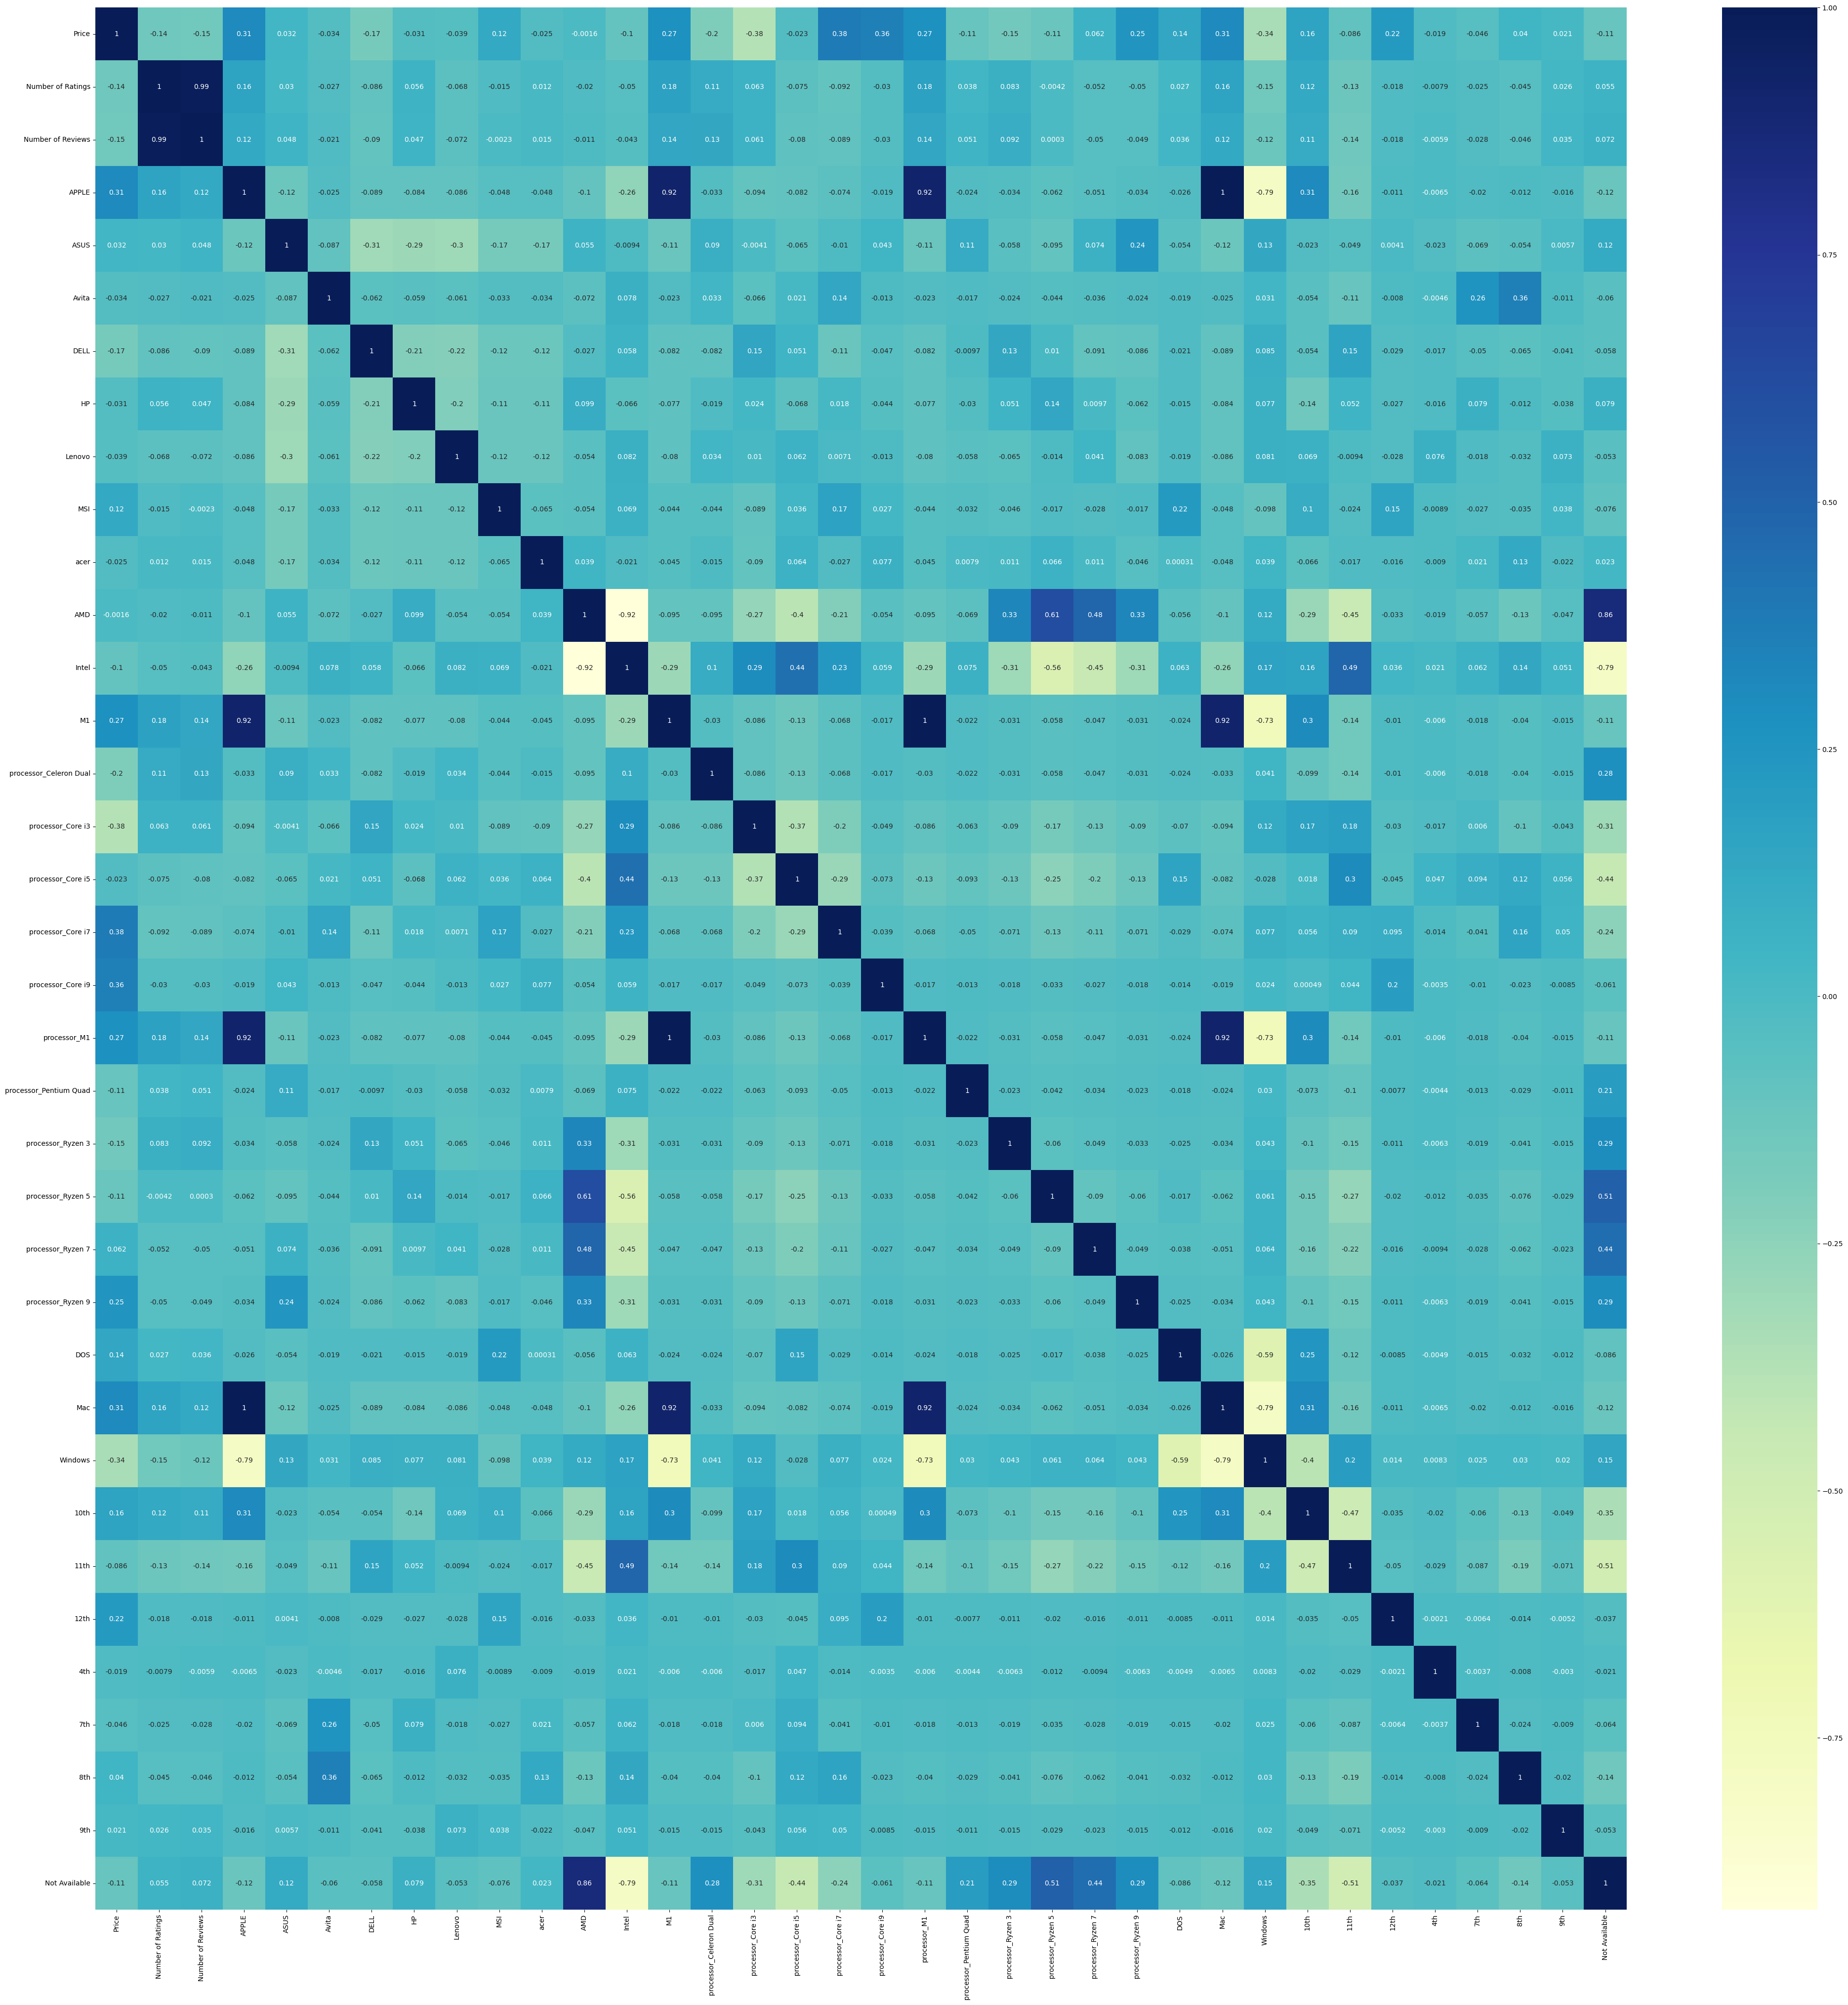

In [665]:
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [666]:
target_corr=data.corr()['Price'].apply(abs).sort_values()

C:\Users\Vansh Dhiman\AppData\Local\Temp\ipykernel_11124\546149506.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_corr=data.corr()['Price'].apply(abs).sort_values()


In [667]:
target_corr

AMD                       0.001583
4th                       0.018769
9th                       0.021192
processor_Core i5         0.023218
acer                      0.024663
HP                        0.030649
ASUS                      0.032036
Avita                     0.033819
Lenovo                    0.039079
8th                       0.040292
7th                       0.045656
processor_Ryzen 7         0.061872
11th                      0.085683
Intel                     0.103966
Not Available             0.105722
processor_Pentium Quad    0.111755
processor_Ryzen 5         0.114138
MSI                       0.123952
Number of Ratings         0.140392
DOS                       0.140780
Number of Reviews         0.148738
processor_Ryzen 3         0.150211
10th                      0.164034
DELL                      0.166272
processor_Celeron Dual    0.200490
12th                      0.219060
processor_Ryzen 9         0.253506
M1                        0.274581
processor_M1        

In [716]:
X=data.drop('Price',axis=1)
Y=data['Price']

In [717]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X.shape,X_train.shape,X_test.shape)

(823, 41) (658, 41) (165, 41)


In [670]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [671]:
forest=RandomForestRegressor()
forest.fit(X_train_scaled,Y_train)

RandomForestRegressor()

In [672]:
forest.score(X_test_scaled,Y_test)

0.799987463933196

In [733]:
X_new_scaled=scaler.transform([X_test.iloc[0]])

C:\Users\Vansh Dhiman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [753]:
ans=forest.predict(X_new_scaled)[0]
print(f"Our Model Predicts the Price: {ans}")

Our Model Predicts the Price: 43877.99
